# 5. Re-designing using Elastic Net

In [ ]:
#Basic scientific math, data shape, and data file libraries for data pre-processing
import io 
import numpy as np 
import pandas as pd

#Plotting 
from matplotlib import pyplot as plt

#5.1
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.linear_model import ElasticNet

## Load data

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#Load data
robo_bohr = pd.read_csv('/content/gdrive/My Drive/DS/molecules/roboBohr.csv', index_col = 0)
robo_bohr 

,0,1,2,3,4,5,6,7,8,9,...,1267,1268,1269,1270,1271,1272,1273,1274,pubchem_id,Eat
0,73.516695,17.817765,12.469551,12.458130,12.454607,12.447345,12.433065,12.426926,12.387474,12.365984,...,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,25004,-19.013763
1,73.516695,20.649126,18.527789,17.891535,17.887995,17.871731,17.852586,17.729842,15.864270,15.227643,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25005,-10.161019
2,73.516695,17.830377,12.512263,12.404775,12.394493,12.391564,12.324461,12.238106,10.423249,8.698826,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25006,-9.376619
3,73.516695,17.875810,17.871259,17.862402,17.850920,17.850440,12.558105,12.557645,12.517583,12.444141,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25009,-13.776438
4,73.516695,17.883818,17.868256,17.864221,17.818540,12.508657,12.490519,12.450098,10.597068,10.595914,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25011,-8.537140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16268,73.516695,20.753166,18.624076,17.872009,17.851690,17.851254,17.742176,14.655754,12.706683,12.557785,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74976,-8.876123
16269,73.516695,20.724740,18.579933,17.741621,14.716676,13.697829,13.697558,13.653512,13.652942,13.652387,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74977,-13.105268
16270,53.358707,20.820797,19.150234,19.148721,15.135514,15.123685,12.942704,12.938162,12.488633,12.488061,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74978,-16.801464
16271,53.358707,15.707759,15.707644,13.653838,13.653570,13.653314,13.652591,13.652585,13.652550,12.743890,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74979,-13.335088


## Data pre-processing

In [ ]:
X = robo_bohr.drop(['Eat'], axis = 1)
y = robo_bohr['Eat']

In [ ]:
standardize = StandardScaler()
y_center = StandardScaler(with_std = False)

In [ ]:
X= standardize.fit_transform(X)
X = pd.DataFrame(X)

In [ ]:
X

,0,1,2,3,4,5,6,7,8,9,...,1266,1267,1268,1269,1270,1271,1272,1273,1274,1275
0,-0.372795,-0.534448,-1.043596,-0.936145,-0.855299,-0.806195,-0.695008,-0.583679,-0.468653,-0.349884,...,-0.049014,-0.049015,-0.049013,11.309499,-0.04901,-0.049013,-0.065791,-0.049013,-0.049061,-0.345475
1,-0.372795,-0.207476,-0.253760,-0.098378,0.130369,0.491641,0.699988,0.930156,0.567022,0.561288,...,-0.049014,-0.049015,-0.049013,-0.088421,-0.04901,-0.049013,-0.065791,-0.049013,-0.049061,-0.345432
2,-0.372795,-0.532992,-1.038028,-0.944372,-0.866204,-0.819541,-0.722963,-0.637582,-1.053761,-1.517533,...,-0.049014,-0.049015,-0.049013,-0.088421,-0.04901,-0.049013,-0.065791,-0.049013,-0.049061,-0.345390
3,-0.372795,-0.527745,-0.339355,-0.102870,0.123643,0.486547,-0.662823,-0.546362,-0.429896,-0.324998,...,-0.049014,-0.049015,-0.049013,-0.088421,-0.04901,-0.049013,-0.065791,-0.049013,-0.049061,-0.345262
4,-0.372795,-0.526820,-0.339746,-0.102590,0.117769,-0.791526,-0.680220,-0.577064,-1.001983,-0.913487,...,-0.049014,-0.049015,-0.049013,-0.088421,-0.04901,-0.049013,-0.065791,-0.049013,-0.049061,-0.345177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16237,-0.372795,-0.195461,-0.241207,-0.101389,0.123783,0.486742,0.671568,0.052590,-0.373567,-0.288813,...,-0.049014,-0.049015,-0.049013,-0.088421,-0.04901,-0.049013,-0.065791,-0.049013,-0.049061,1.784976
16238,-0.372795,-0.198744,-0.246962,-0.121493,-0.444938,-0.507005,-0.369525,-0.233523,-0.091693,0.059716,...,-0.049014,-0.049015,-0.049013,-0.088421,-0.04901,-0.049013,-0.065791,-0.049013,-0.049061,1.785019
16239,-0.550877,-0.187651,-0.172610,0.095465,-0.368957,-0.165855,-0.563826,-0.437735,-0.438520,-0.311014,...,-0.049014,-0.049015,-0.049013,-0.088421,-0.04901,-0.049013,-0.065791,-0.049013,-0.049061,1.785062
16240,-0.550877,-0.778117,-0.621434,-0.751781,-0.637796,-0.517656,-0.381100,-0.233787,-0.091810,-0.229556,...,-0.049014,-0.049015,-0.049013,-0.088421,-0.04901,-0.049013,-0.065791,-0.049013,-0.049061,1.785104


In [ ]:
y -= np.mean(y)
y

0       -7.834793
1        1.017950
2        1.802350
3       -2.597469
4        2.641829
           ...   
16268    2.302846
16269   -1.926299
16270   -5.622495
16271   -2.156118
16272   -2.157726
Name: Eat, Length: 16242, dtype: float64

##5.1 Illustrating the effect of the tuning parameter on the inferred elastic net regression coefficients using machine learning libraries in Python

Plot with alpha = 0

In [ ]:
from sklearn.linear_model import ElasticNet

In [ ]:
lambdas = [10e-2, 10e-1, 10e0, 10e1, 10e2,10e3,10e4, 10e5, 10e6]
beta_list = []

for lamb in lambdas:
  elastic_net = ElasticNet(alpha = lamb, l1_ratio = 0, max_iter = 1000)
  elastic_net.fit(X,y)
  beta_list.append(elastic_net.coef_)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.807e+03, tolerance: 2.175e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.558e+03, tolerance: 2.175e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented

No handles with labels found to put in legend.


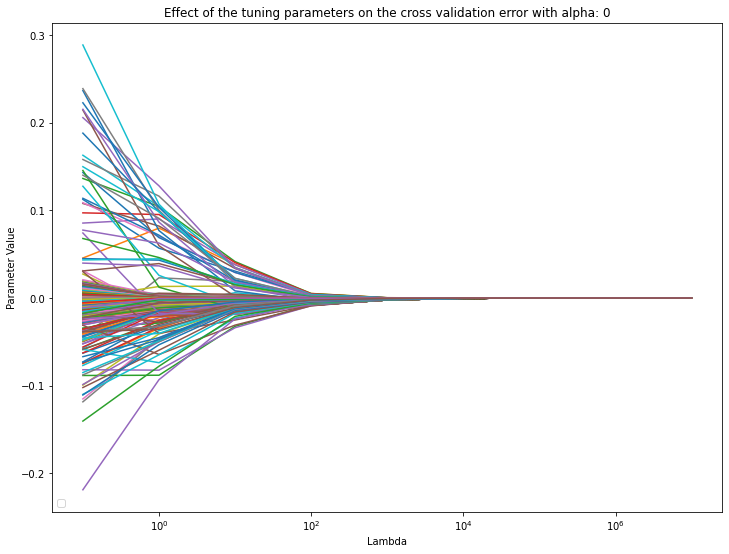

In [ ]:
#Define plotting code
betas = pd.DataFrame(beta_list)
betas.index = lambdas 

plt.figure(figsize=(12,9))
plt.plot(betas)
plt.title("Effect of the tuning parameters on the cross validation error with alpha: 0")
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Parameter Value')
plt.legend(loc = 'lower left')
plt.show()

Plot with alpha = 0.2

In [ ]:
lambdas = [10**-2, 10**-1,1, 10, 10**2, 10**3, 10**4, 10**5, 10**6]
beta_list = []

for lamb in lambdas: 
  elastic_net = ElasticNet(alpha = lamb, l1_ratio = 0.2, max_iter = 1000)
  elastic_net.fit(X,y)
  beta_list.append(elastic_net.coef_)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.908e+02, tolerance: 2.175e+01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.031e+02, tolerance: 2.175e+01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


No handles with labels found to put in legend.


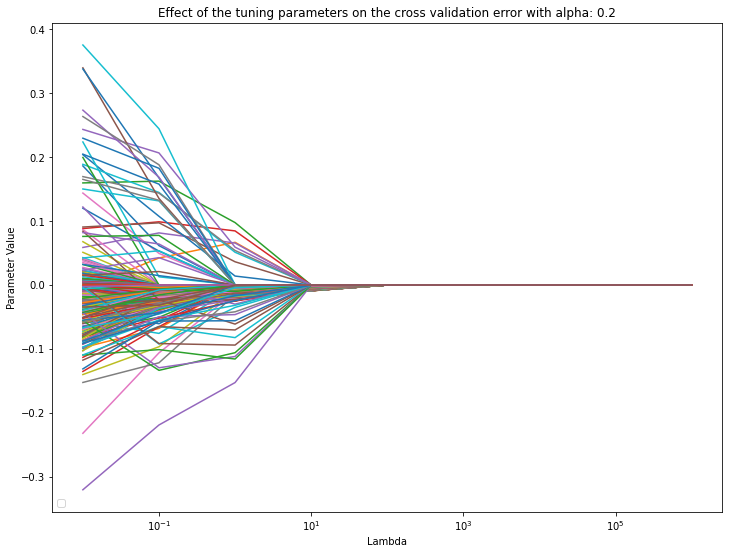

In [ ]:
#Define plotting code
betas = pd.DataFrame(beta_list)
betas.index = lambdas 

plt.figure(figsize=(12,9))
plt.plot(betas)
plt.title("Effect of the tuning parameters on the cross validation error with alpha: 0.2")
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Parameter Value')
plt.legend(loc = 'lower left')
plt.show()

Plot with alpha = 0.4

In [ ]:
lambdas = [10**-2, 10**-1,1, 10, 10**2, 10**3, 10**4, 10**5, 10**6]
beta_list = []

for lamb in lambdas: 
  elastic_net = ElasticNet(alpha = lamb, l1_ratio = 0.4, max_iter = 1000)
  elastic_net.fit(X,y)
  beta_list.append(elastic_net.coef_)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.027e+02, tolerance: 2.175e+01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.723e+01, tolerance: 2.175e+01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


No handles with labels found to put in legend.


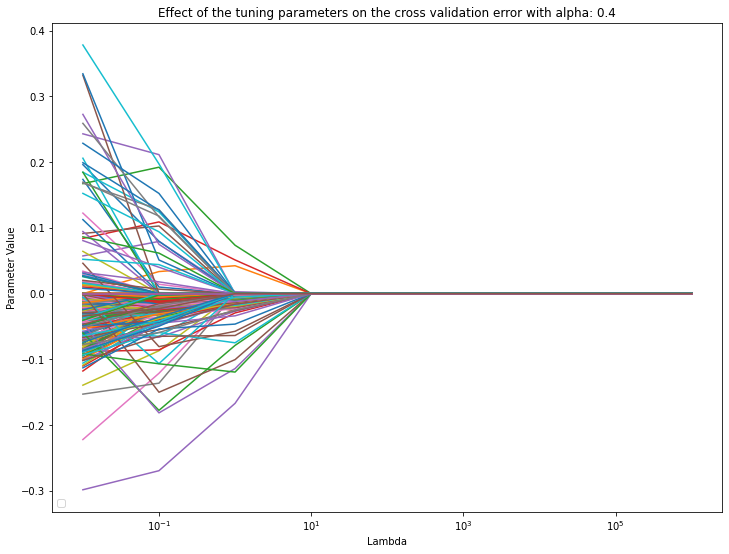

In [ ]:
#Define plotting code
betas = pd.DataFrame(beta_list)
betas.index = lambdas 

plt.figure(figsize=(12,9))
plt.plot(betas)
plt.title("Effect of the tuning parameters on the cross validation error with alpha: 0.4")
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Parameter Value')
plt.legend(loc = 'lower left')
plt.show()

Plot with alpha = 0.6

In [ ]:
lambdas = [10**-2, 10**-1,1, 10, 10**2, 10**3, 10**4, 10**5, 10**6]
beta_list = []

for lamb in lambdas: 
  elastic_net = ElasticNet(alpha = lamb, l1_ratio = 0.6, max_iter = 1000)
  elastic_net.fit(X,y)
  beta_list.append(elastic_net.coef_)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.198e+01, tolerance: 2.175e+01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.392e+01, tolerance: 2.175e+01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


No handles with labels found to put in legend.


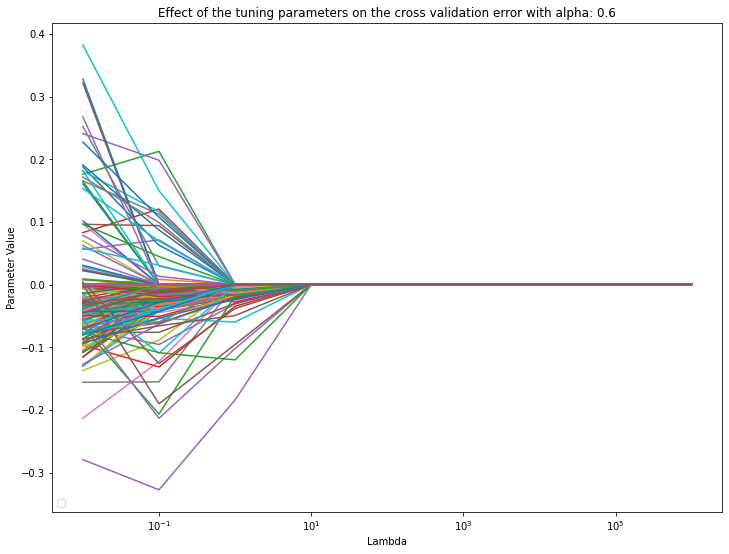

In [ ]:
#Define plotting code
betas = pd.DataFrame(beta_list)
betas.index = lambdas 

plt.figure(figsize=(12,9))
plt.plot(betas)
plt.title("Effect of the tuning parameters on the cross validation error with alpha: 0.6")
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Parameter Value')
plt.legend(loc = 'lower left')
plt.show()

Plot with alpha = 0.8

In [ ]:
lambdas = [10**-2, 10**-1,1, 10, 10**2, 10**3, 10**4, 10**5, 10**6]
beta_list = []

for lamb in lambdas: 
  elastic_net = ElasticNet(alpha = lamb, l1_ratio = 0.8, max_iter = 1000)
  elastic_net.fit(X,y)
  beta_list.append(elastic_net.coef_)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.630e+01, tolerance: 2.175e+01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


No handles with labels found to put in legend.


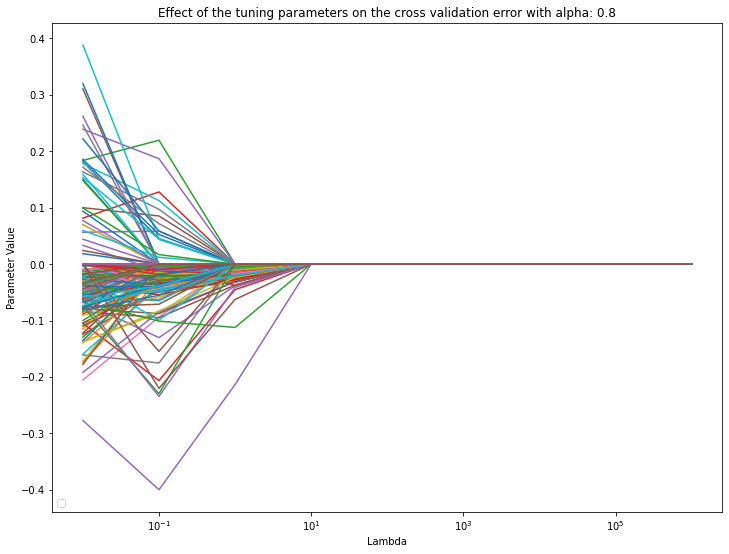

In [ ]:
#Define plotting code
betas = pd.DataFrame(beta_list)
betas.index = lambdas 

plt.figure(figsize=(12,9))
plt.plot(betas)
plt.title("Effect of the tuning parameters on the cross validation error with alpha: 0.8")
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Parameter Value')
plt.legend(loc = 'lower left')
plt.show()

Plot with alpha = 1

In [ ]:
lambdas = [10**-2, 10**-1,1, 10, 10**2, 10**3, 10**4, 10**5, 10**6]
beta_list = []

for lamb in lambdas: 
  elastic_net = ElasticNet(alpha = lamb, l1_ratio = 1, max_iter = 1000)
  elastic_net.fit(X,y)
  beta_list.append(elastic_net.coef_)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.888e+01, tolerance: 2.175e+01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


No handles with labels found to put in legend.


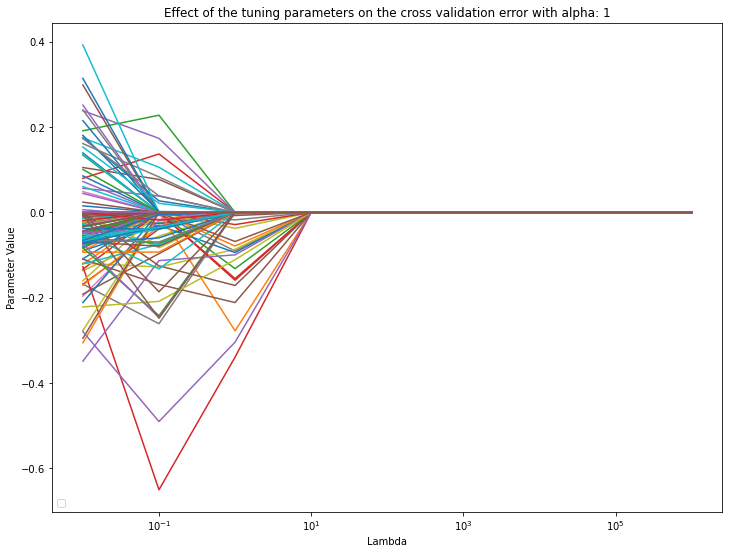

In [ ]:
#Define plotting code
betas = pd.DataFrame(beta_list)
betas.index = lambdas 

plt.figure(figsize=(12,9))
plt.plot(betas)
plt.title("Effect of the tuning parameters on the cross validation error with alpha: 1")
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Parameter Value')
plt.legend(loc = 'lower left')
plt.show()

## 5.2 Displaying the effect of the tuning parameter on the cross validation error

In [ ]:
from sklearn.model_selection import GridSearchCV

elastic_net = ElasticNet(max_iter = 1000)
parameters = {'alpha': [1e-2,1e-1,1e0,1e1,1e2,1e3,1e4,1e5,1e6], 'l1_ratio':[0,0.2,0.4,0.6,0.8,1]}
mse = make_scorer(mean_squared_error, greater_is_better = False)
elastic_regressor = GridSearchCV(elastic_net,parameters,scoring = mse, cv = 5, refit=False)
elastic_regressor.fit(X,y)
elastic_regressor.cv_results_['mean_test_score']

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.001e+03, tolerance: 1.746e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.455e+03, tolerance: 1.679e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented

array([ -0.78286311,  -0.76236281,  -0.76983784,  -0.76722491,
        -0.77419946,  -0.78528041,  -0.72066403,  -0.80548106,
        -0.91226253,  -0.99826627,  -1.07846124,  -1.14937692,
        -0.93477097,  -1.53281015,  -2.03743728,  -2.58465042,
        -3.0565806 ,  -3.58326499,  -1.70929164,  -7.5646749 ,
       -13.79501047, -13.79501047, -13.79501047, -13.79501047,
        -3.03030742, -13.79501047, -13.79501047, -13.79501047,
       -13.79501047, -13.79501047,  -7.65093169, -13.79501047,
       -13.79501047, -13.79501047, -13.79501047, -13.79501047,
       -12.6318094 , -13.79501047, -13.79501047, -13.79501047,
       -13.79501047, -13.79501047, -13.66754153, -13.79501047,
       -13.79501047, -13.79501047, -13.79501047, -13.79501047,
       -13.78214077, -13.79501047, -13.79501047, -13.79501047,
       -13.79501047, -13.79501047])

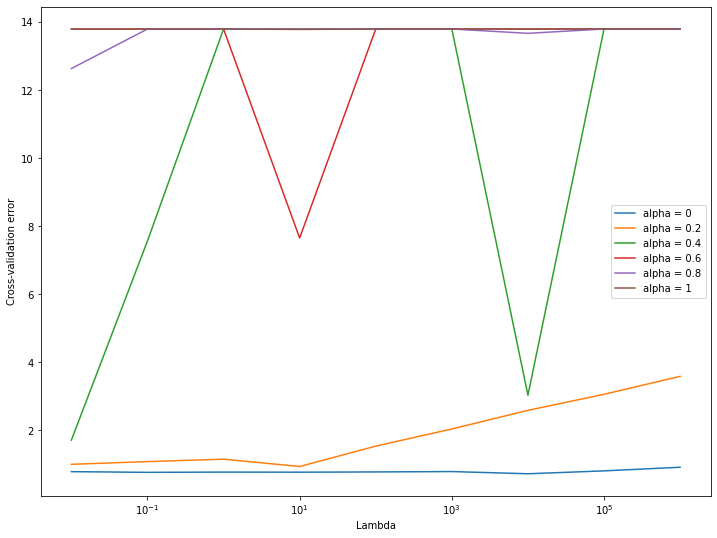

In [ ]:
plt.figure(figsize=(12,9))
plt.plot(lambdas, np.absolute(elastic_regressor.cv_results_['mean_test_score'][0:9]), label = 'alpha = 0')
plt.plot(lambdas, np.absolute(elastic_regressor.cv_results_['mean_test_score'][9:18]), label = 'alpha = 0.2')
plt.plot(lambdas, np.absolute(elastic_regressor.cv_results_['mean_test_score'][18:27]), label = 'alpha = 0.4')
plt.plot(lambdas, np.absolute(elastic_regressor.cv_results_['mean_test_score'][27:36]), label = 'alpha = 0.6')
plt.plot(lambdas, np.absolute(elastic_regressor.cv_results_['mean_test_score'][36:45]), label = 'alpha = 0.8')
plt.plot(lambdas, np.absolute(elastic_regressor.cv_results_['mean_test_score'][45:54]), label = 'alpha = 1')
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Cross-validation error')
plt.legend()
plt.show()

## 5.3 Showing the value of λ that generated the smallest CV(5) error.

In [ ]:
print(elastic_regressor.best_params_)
print(elastic_regressor.best_score_)

{'alpha': 0.1, 'l1_ratio': 0}
-0.7206640287925272


The smallest value of lambda that generated the smallest CV(5) error is lambda = 0.1 and alpha = 0. WHY?

##5.4 Retraining the model on the entire dataset of N = 16242 observations and providing the estimates of the p = 1275 best-fit model parameters using the optimal value of lambda and alpha.

In [ ]:
elastic_net = ElasticNet(alpha = 0.1,l1_ratio = 0, max_iter = 1000)
elastic_net.fit(X,y)
elastic_net.coef_

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.807e+03, tolerance: 2.175e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


array([ 0.1125839 ,  0.04571225,  0.13650541, ..., -0.00534878,
       -0.01121294, -0.0384475 ])

In [ ]:
elastic_net = ElasticNet(alpha = 10e-2, l1_ratio = 1, max_iter = 1000)
elastic_net.fit(X,y)
elastic_net.coef_

array([ 0.        ,  0.        ,  0.22782245, ..., -0.        ,
       -0.        , -0.        ])

In [ ]:
elastic_net = ElasticNet(alpha = 10e-2, l1_ratio = 0.8, max_iter = 1000)
elastic_net.fit(X,y)
elastic_net.coef_

array([ 0.        ,  0.        ,  0.21961667, ..., -0.        ,
       -0.        , -0.        ])

Question: 
<br>

How do these estimates compare to the estimates obtained from ridge regression (𝛼 = 1
under optimal 𝜆 for 𝛼 = 1000) and lasso (𝛼 = 0 under optimal 𝜆 for 𝛼 = 0) on the entire
dataset of 𝑁 = 16242 observations?

Answer:
<br>

Based on the estimation coefficients, it appears that estimation coefficients with lasso penalizing term are better than ridge for this dataset. Then, we may assume that ridge parameters will produce a higher error. 